In [2]:
import pandas as pd
import numpy as np
import scipy as stats 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./zippedData/masterdf.csv')

In [8]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [9]:
# Define a function to map months to seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

df['Seasons'] = df['release_date'].dt.month.map(get_season)
df.head()

,release_date,movie,production_budget,domestic_gross,genres,studio,foreign_gross,domestic_ROI_percent,domestic_Profit,Seasons
0,2011-05-20,PiratesoftheCaribbeanOnStrangerTides,410600000,241063875,"Action,Adventure,Fantasy",BV,804600000,58.710150,-169536125,Spring
1,2015-05-01,AvengersAgeofUltron,330600000,459005868,"Action,Adventure,Sci-Fi",BV,946400000,138.840250,128405868,Spring
2,2017-12-15,StarWarsTheLastJedi,317000000,620181382,"Action,Adventure,Fantasy",BV,712400000,195.640815,303181382,Winter
3,2015-12-18,StarWarsTheForceAwakens,306000000,936662225,"Action,Adventure,Fantasy",BV,"1,131.6",306.098766,630662225,Winter
4,2018-04-27,AvengersInfinityWar,300000000,678815482,"Action,Adventure,Sci-Fi",BV,"1,369.5",226.271827,378815482,Spring


In [10]:
genres = df['genres'].str.split(',', expand=True)
unique_genres = set(genres.values.ravel()) - {None}

for genre in unique_genres:
    df[genre] = genres.apply(lambda row: 1 if genre in row.values else 0, axis=1)

df.head(20)

,release_date,movie,production_budget,domestic_gross,genres,studio,foreign_gross,domestic_ROI_percent,domestic_Profit,Seasons,...,Adventure,Western,War,Fantasy,Music,Horror,Thriller,Sci-Fi,History,Drama
0,2011-05-20,PiratesoftheCaribbeanOnStrangerTides,410600000,241063875,"Action,Adventure,Fantasy",BV,804600000,58.710150,-169536125,Spring,...,1,0,0,1,0,0,0,0,0,0
1,2015-05-01,AvengersAgeofUltron,330600000,459005868,"Action,Adventure,Sci-Fi",BV,946400000,138.840250,128405868,Spring,...,1,0,0,0,0,0,0,1,0,0
2,2017-12-15,StarWarsTheLastJedi,317000000,620181382,"Action,Adventure,Fantasy",BV,712400000,195.640815,303181382,Winter,...,1,0,0,1,0,0,0,0,0,0
3,2015-12-18,StarWarsTheForceAwakens,306000000,936662225,"Action,Adventure,Fantasy",BV,"1,131.6",306.098766,630662225,Winter,...,1,0,0,1,0,0,0,0,0,0
4,2018-04-27,AvengersInfinityWar,300000000,678815482,"Action,Adventure,Sci-Fi",BV,"1,369.5",226.271827,378815482,Spring,...,1,0,0,0,0,0,0,1,0,0
5,2017-11-17,JusticeLeague,300000000,229024295,"Action,Adventure,Fantasy",WB,428900000,76.341432,-70975705,Autumn,...,1,0,0,1,0,0,0,0,0,0
6,2015-11-06,Spectre,300000000,200074175,"Action,Adventure,Thriller",Sony,680600000,66.691392,-99925825,Autumn,...,1,0,0,0,0,0,1,0,0,0
7,2012-07-20,TheDarkKnightRises,275000000,448139099,"Action,Thriller",WB,636800000,162.959672,173139099,Summer,...,0,0,0,0,0,0,1,0,0,0
8,2018-05-25,SoloAStarWarsStory,275000000,213767512,"Action,Adventure,Sci-Fi",BV,179200000,77.733641,-61232488,Spring,...,1,0,0,0,0,0,0,1,0,0
9,2013-07-02,TheLoneRanger,275000000,89302115,"Action,Adventure,Western",BV,171200000,32.473496,-185697885,Summer,...,1,1,0,0,0,0,0,0,0,0


In [11]:
#df.to_csv('./zippedData/TableauDF.csv', index=False)

In [25]:
df_sorted = df.sort_values(by='domestic_Profit', ascending=False)

In [26]:
df_sorted.head(10)

,release_date,movie,production_budget,domestic_gross,genres,studio,foreign_gross,domestic_ROI_percent,domestic_Profit,Seasons,...,Adventure,Western,War,Fantasy,Music,Horror,Thriller,Sci-Fi,History,Drama
3,2015-12-18,StarWarsTheForceAwakens,306000000,936662225,"Action,Adventure,Fantasy",BV,"1,131.6",306.098766,630662225,Winter,...,1,0,0,1,0,0,0,0,0,0
28,2018-02-16,BlackPanther,200000000,700059566,"Action,Adventure,Sci-Fi",BV,646900000,350.029783,500059566,Winter,...,1,0,0,0,0,0,0,1,0,0
24,2015-06-12,JurassicWorld,215000000,652270625,"Action,Adventure,Sci-Fi",Uni.,"1,019.4",303.381686,437270625,Summer,...,1,0,0,0,0,0,0,1,0,0
29,2018-06-15,Incredibles2,200000000,608581744,NaN,BV,634200000,304.290872,408581744,Summer,...,0,0,0,0,0,0,0,0,0,0
19,2012-05-04,TheAvengers,225000000,623279547,"Action,Adventure,Sci-Fi",BV,NaN,277.013132,398279547,Spring,...,1,0,0,0,0,0,0,1,0,0
4,2018-04-27,AvengersInfinityWar,300000000,678815482,"Action,Adventure,Sci-Fi",BV,"1,369.5",226.271827,378815482,Spring,...,1,0,0,0,0,0,0,1,0,0
95,2017-03-17,BeautyandtheBeast,160000000,504014165,"Family,Fantasy,Musical",NaN,NaN,315.008853,344014165,Spring,...,0,0,0,1,0,0,0,0,0,0
30,2016-12-16,RogueOneAStarWarsStory,200000000,532177324,"Action,Adventure,Sci-Fi",BV,523900000,266.088662,332177324,Winter,...,1,0,0,0,0,0,0,1,0,0
278,2012-03-23,TheHungerGames,80000000,408010692,"Action,Adventure,Sci-Fi",LGF,286400000,510.013365,328010692,Spring,...,1,0,0,0,0,0,0,1,0,0
250,2017-12-20,JumanjiWelcometotheJungle,90000000,404508916,"Action,Adventure,Comedy",Sony,557600000,449.454351,314508916,Winter,...,1,0,0,0,0,0,0,0,0,0


In [27]:
df_sorted.loc[95 , 'studio'] = 'BV'

In [28]:
df_sorted.head(10)

,release_date,movie,production_budget,domestic_gross,genres,studio,foreign_gross,domestic_ROI_percent,domestic_Profit,Seasons,...,Adventure,Western,War,Fantasy,Music,Horror,Thriller,Sci-Fi,History,Drama
3,2015-12-18,StarWarsTheForceAwakens,306000000,936662225,"Action,Adventure,Fantasy",BV,"1,131.6",306.098766,630662225,Winter,...,1,0,0,1,0,0,0,0,0,0
28,2018-02-16,BlackPanther,200000000,700059566,"Action,Adventure,Sci-Fi",BV,646900000,350.029783,500059566,Winter,...,1,0,0,0,0,0,0,1,0,0
24,2015-06-12,JurassicWorld,215000000,652270625,"Action,Adventure,Sci-Fi",Uni.,"1,019.4",303.381686,437270625,Summer,...,1,0,0,0,0,0,0,1,0,0
29,2018-06-15,Incredibles2,200000000,608581744,NaN,BV,634200000,304.290872,408581744,Summer,...,0,0,0,0,0,0,0,0,0,0
19,2012-05-04,TheAvengers,225000000,623279547,"Action,Adventure,Sci-Fi",BV,NaN,277.013132,398279547,Spring,...,1,0,0,0,0,0,0,1,0,0
4,2018-04-27,AvengersInfinityWar,300000000,678815482,"Action,Adventure,Sci-Fi",BV,"1,369.5",226.271827,378815482,Spring,...,1,0,0,0,0,0,0,1,0,0
95,2017-03-17,BeautyandtheBeast,160000000,504014165,"Family,Fantasy,Musical",BV,NaN,315.008853,344014165,Spring,...,0,0,0,1,0,0,0,0,0,0
30,2016-12-16,RogueOneAStarWarsStory,200000000,532177324,"Action,Adventure,Sci-Fi",BV,523900000,266.088662,332177324,Winter,...,1,0,0,0,0,0,0,1,0,0
278,2012-03-23,TheHungerGames,80000000,408010692,"Action,Adventure,Sci-Fi",LGF,286400000,510.013365,328010692,Spring,...,1,0,0,0,0,0,0,1,0,0
250,2017-12-20,JumanjiWelcometotheJungle,90000000,404508916,"Action,Adventure,Comedy",Sony,557600000,449.454351,314508916,Winter,...,1,0,0,0,0,0,0,0,0,0


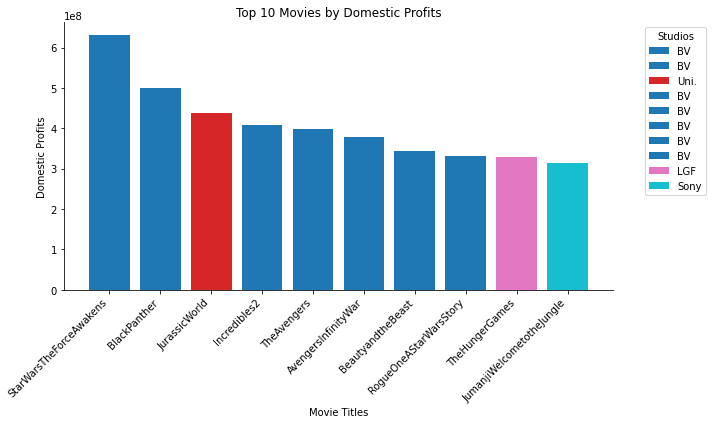

In [39]:
# Get unique studios
unique_studios = top_10_movies['studio'].unique()
# Define colors for each unique studio
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_studios)))

# Create a dictionary to map studios to colors
color_dict = dict(zip(unique_studios, colors))

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each movie and plot its bar with corresponding color
for i, (movie, profit, studio) in enumerate(zip(top_10_movies['movie'], top_10_movies['domestic_Profit'], top_10_movies['studio'])):
    plt.bar(i, profit, color=color_dict.get(studio, 'gray'), label=studio)

plt.xlabel('Movie Titles')
plt.ylabel('Domestic Profits')
plt.title('Top 10 Movies by Domestic Profits')
plt.xticks(np.arange(10), top_10_movies['movie'], rotation=45, ha='right')  # Set x-axis ticks and labels
plt.legend(title='Studios', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend
plt.gca().spines['top'].set_visible(False)  # Hide top spine
plt.gca().spines['right'].set_visible(False)  # Hide right spine

plt.tight_layout()
plt.show()